# Artificial Neural Network

### Importing the libraries

In [11]:
import numpy as np
import pandas as pd
import tensorflow  as tf
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.9.2'

## Data Preprocessing

### Importing the dataset

In [26]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# Drop the columns as explained above
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [9]:
# Check variable data types
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

0    7963
1    2037
Name: Exited, dtype: int64


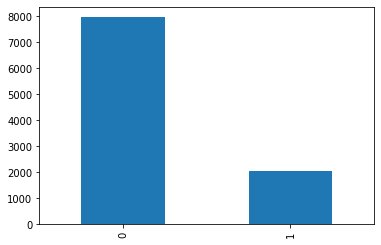

In [16]:
#Counting 1 and 0 Value in Churn column
print(df.Exited.value_counts())
p=df.Exited.value_counts().plot(kind="bar")

In [17]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [20]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [21]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,2] = le.fit_transform(X[:,2])

In [23]:
print(X[:,2])

[0 0 0 ... 0 1 0]


One Hot Encoding the "Geography" column

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [25]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify = y, random_state = 0)

### Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
print(X_train[0])

[ 0.998002   -0.57812007 -0.57504086 -1.24021723 -1.09665089  0.77986083
  0.35390313 -1.23451386 -0.90298067 -1.54963239 -1.03849022  1.64099027]


## Building the ANN

### Initializing the ANN

In [31]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [32]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [33]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [34]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

### Compiling the ANN

In [35]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [36]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
250/250 [==============================] - 1s 944us/step - loss: 0.5340 - accuracy: 0.7529
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4598 - accuracy: 0.7962
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4319 - accuracy: 0.8037
Epoch 4/50
250/250 [==============================] - 0s 989us/step - loss: 0.4097 - accuracy: 0.8149
Epoch 5/50
250/250 [==============================] - 0s 958us/step - loss: 0.3895 - accuracy: 0.8342
Epoch 6/50
250/250 [==============================] - 0s 952us/step - loss: 0.3731 - accuracy: 0.8468
Epoch 7/50
250/250 [==============================] - 0s 998us/step - loss: 0.3628 - accuracy: 0.8509
Epoch 8/50
250/250 [==============================] - 0s 967us/step - loss: 0.3568 - accuracy: 0.8551
Epoch 9/50
250/250 [==============================] - 0s 987us/step - loss: 0.3532 - accuracy: 0.8566
Epoch 10/50
250/250 [==============================] - 0s 946us/step - loss: 0.3508 - 

## Making the predictions and evaluating the model

### Predicting the result of a single observation

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

In [37]:
print(ann.predict(sc.transform([[1,0,0,600,1,40,3,60000,2,1,1,50000]]))>0.5)

1/1 [==============================] - 0s 77ms/step
[[False]]


### Predicting the Test set results

In [38]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 746us/step
[[0 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


### Making the Confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1535   58]
 [ 222  185]]


0.86

In [41]:
print("Classification report - n", classification_report(y_test,y_pred))

Classification report - n               precision    recall  f1-score   support

           0       0.87      0.96      0.92      1593
           1       0.76      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

